In [284]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/vkontakte_group_01_2016-08-01_2020-03-15.csv")
df.head()

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,15.03.2020,views,NaN,NaN,4
1,15.03.2020,visitors,NaN,NaN,3
2,15.03.2020,gender,М,NaN,3
3,15.03.2020,age,24-27,NaN,1
4,15.03.2020,age,30-35,NaN,2


In [130]:
views=[]
viewers=[]
for year in range(2016,2021):
    st=df[df["Дата"].str.contains(str(year))]
    views.append(st[st["Критерий"]=="views"]['Значение'].sum())#число просмотров
    viewers.append(st[st["Критерий"]=="visitors"]['Значение'].sum())#число посетителей


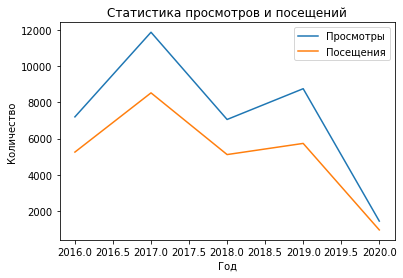

In [209]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(2016,2021),views,label="Просмотры")
plt.plot(range(2016,2021),viewers,label="Посещения")
plt.title('Статистика просмотров и посещений')   # заголовок
plt.xlabel('Год')   # подпись оси OX
plt.ylabel('Количество')
plt.legend()
plt.show()

In [136]:
reach=[]
reach_subs=[]
for year in range(2016,2021):
    st=df[df["Дата"].str.contains(str(year))]
    reach.append(st[st["Критерий"]=="reach"]["Значение"].sum())
    reach_subs.append(st[st["Критерий"]=="reach_subscribers"]["Значение"].sum())

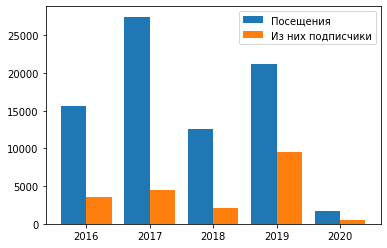

In [211]:
ax = plt.axes()
ax.bar([i-0.2 for i in range(2016,2021)],reach,width = 0.4,label="Посещения")
ax.bar([i+0.2 for i in range(2016,2021)],reach_subs,width = 0.4,label="Из них подписчики")
ax.legend()
plt.show()

In [200]:
al=df[df["Критерий"].str.contains("gender")]
men=len(al[al["Парам. №1"]=="М"])
women=len(al[al["Парам. №1"]=="Ж"])

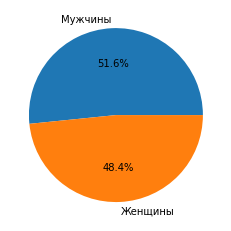

In [212]:
axx = plt.subplot()
axx.pie([men,women], labels=["Мужчины","Женщины"],autopct='%1.1f%%')
plt.show()

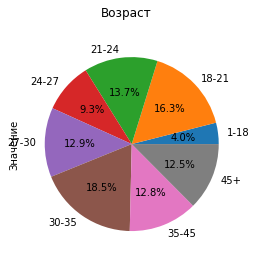

In [373]:
a=(df[df["Критерий"]=="age"]).groupby("Парам. №1").sum()
b=(df[df["Критерий"]=="gender_age"]).groupby("Парам. №2").sum()
ages=a+b
ages.plot(kind="pie",subplots=True,legend=False,title="Возраст",autopct='%1.1f%%')
plt.show()

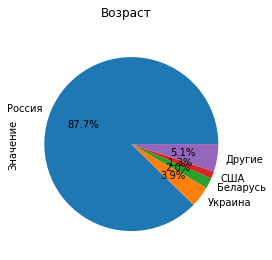

In [389]:
countries=df[df["Критерий"]=="countries"].groupby("Парам. №1").sum()
cv=countries.sort_values("Значение",ascending=False)
c=cv[:4]
c.loc["Другие"]=[cv[4:].sum().sum()]
c.plot(kind="pie",subplots=True,legend=False,title="Возраст",autopct='%1.1f%%')
plt.show()

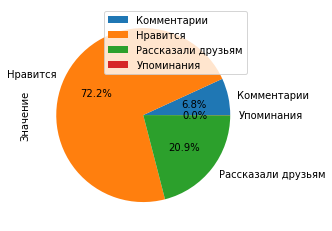

In [401]:
fb=df[df["Критерий"]=="feedback"].groupby("Парам. №1").sum()
fb.plot(kind="pie",subplots=True,autopct='%1.1f%%')
plt.show()

Как видно по статистике, число посещений группы снижается, и, хотя не понятна активность в группе за 2020 год, можно сказать, что вложение будет неэффективным. Даже учитывая тот факт, что большая часть аудитории - люди из России и младше 30.